In [3]:
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict


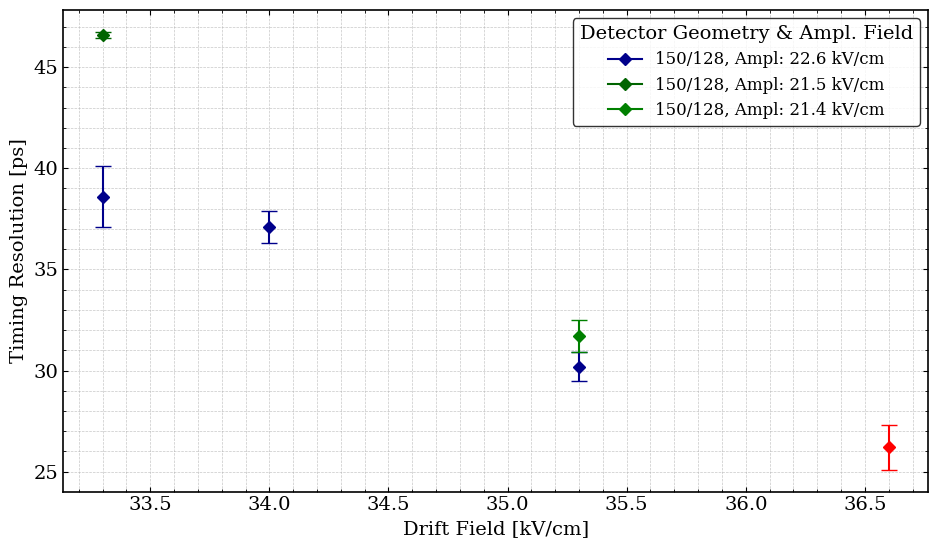

In [8]:


# ROOT-like plot style
plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["DejaVu Serif"],
    "font.size": 14,
    "axes.linewidth": 1.2,
    "xtick.direction": "in",
    "ytick.direction": "in",
    "xtick.top": True,
    "ytick.right": True,
    "legend.frameon": True,
    "legend.edgecolor": "black"
})

# --- New Data ---

# Format: (geometry, drift_field, ampl_field, timing_resolution, error)
raw_data = [
    ("150/128", 33.3, 22.6, 38.6, 1.5),
    ("150/128", 34.0, 22.6, 37.1, 0.8),
    ("150/128", 35.3, 22.6, 30.2, 0.7),
    ("150/128", 33.3, 21.5, 46.6, 0.14),
    ("150/128", 35.3, 21.4, 31.7, 0.8),
    ("150/128", 36.6, 21.4, 26.2, 1.1)
]

# Group data by (geometry, ampl_field)
grouped_data = defaultdict(lambda: {"x": [], "y": [], "err": []})

for geom, drift, ampl, time, err in raw_data:
    grouped_data[(geom, ampl)]["x"].append(drift)
    grouped_data[(geom, ampl)]["y"].append(time)
    grouped_data[(geom, ampl)]["err"].append(err)

# --- Identify points to highlight in red ---

# Find highest drift field
max_drift_point = max(raw_data, key=lambda x: x[1])
# Find lowest timing resolution
min_time_point = min(raw_data, key=lambda x: x[3])

# --- Plotting ---

fig, ax = plt.subplots(figsize=(10, 6))

# Marker style by geometry
marker_styles = {
    "150/128": 'D'  # Diamond marker
}

# Color map for amplification fields
color_map = {
    22.6: 'darkblue',
    21.5: 'darkgreen',
    21.4: 'green',
}

# Plot each group
for (geom, ampl_field), data in grouped_data.items():
    marker = marker_styles.get(geom, 'o')
    color = color_map.get(ampl_field, 'black')

    # Plot points individually to check for highlights
    for x, y, e in zip(data["x"], data["y"], data["err"]):
        point = (geom, x, ampl_field, y, e)
        if (point[0], point[1], point[2], point[3]) in [
            (max_drift_point[0], max_drift_point[1], max_drift_point[2], max_drift_point[3]),
            (min_time_point[0], min_time_point[1], min_time_point[2], min_time_point[3])
        ]:
            ax.errorbar(x, y, yerr=e, fmt=marker, color='red',
                        markersize=6, capsize=6)
        else:
            ax.errorbar(x, y, yerr=e, fmt=marker, color=color,
                        markersize=6, capsize=6)

    label = f'{geom}, Ampl: {ampl_field} kV/cm'
    ax.plot([], [], marker + '-', color=color, label=label)

# Axis labels
ax.set_xlabel("Drift Field [kV/cm]")
ax.set_ylabel("Timing Resolution [ps]")

# Grid & aesthetics
ax.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
ax.minorticks_on()
# for spine in ax.spines.values():
#     spine.set_visible(False)

# Legend & layout
ax.legend(title="Detector Geometry & Ampl. Field", fontsize=12, loc='upper right')
plt.tight_layout(rect=[0, 0, 0.96, 0.95])

plt.savefig("timing_resolution_vs_drift_field-200KO.pdf", dpi=300)
